# STUDENTS' EXAM PREPARATION TIME AND THE RELATIVE RESULTS

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

df = pd.read_csv("exam-info.csv")

df.head()

,Ma sinh vien,Ho va ten,Ngay sinh,Dia chi,So gio,Dau?
0,11220001,A,1/1/2004,Ha Noi,0.50,0
1,11220002,B,1/2/2004,Ninh Binh,1.50,0
2,11220003,C,1/3/2004,Thanh Hoa,2.25,1
3,11220004,D,1/4/2004,Ninh Binh,3.25,1
4,11220005,E,1/5/2004,Nghe An,4.50,1


## 1. Add Student ID, Fullname, Birthdate and Address columns to the data table. Separate the dataset into a training dataset and a testing dataset.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df[["So gio"]], df["Dau?"], test_size=0.2, random_state=100)

X_train

,So gio
13,4.00
6,1.75
16,2.00
1,1.50
9,4.75
14,5.00
12,2.75
5,0.75
2,2.25
4,4.50


## 2. Fulfill the following programming requirements:
### a) Print the dataset's information and the meaning of attributes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ma sinh vien  20 non-null     int64  
 1   Ho va ten     20 non-null     object 
 2   Ngay sinh     20 non-null     object 
 3   Dia chi       20 non-null     object 
 4   So gio        20 non-null     float64
 5   Dau?          20 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ KB


### b) Visualize important informations with charts

<Axes: xlabel='Dia chi', ylabel='count'>

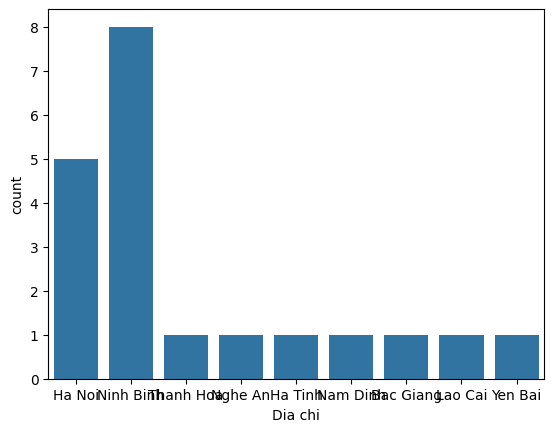

In [14]:
# Count the student basing on their addresses
sns.countplot(df, x="Dia chi")

<Axes: xlabel='Dau?', ylabel='count'>

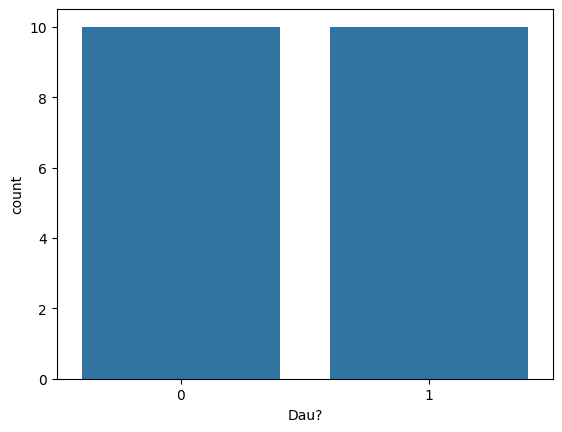

In [18]:
# How many students pass the exam and how many students do not? 
sns.countplot(df, x="Dau?")

<Axes: xlabel='So gio', ylabel='Dau?'>

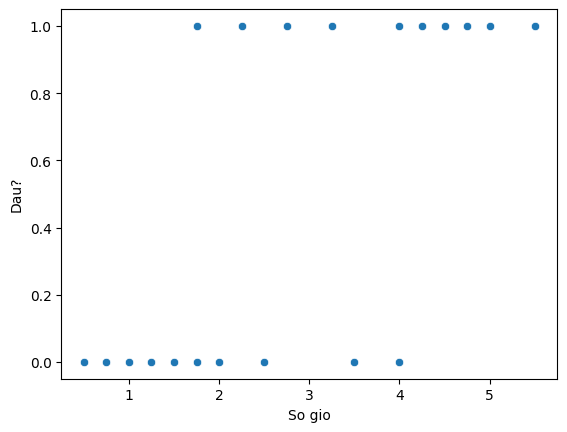

In [23]:
# Relation between hours spent and exam result
sns.scatterplot(df, x="So gio", y="Dau?")

### c) Find the correlation between hours spent and exam result

In [25]:
df[["So gio", "Dau?"]].corr()

,So gio,Dau?
So gio,1.000000,0.645012
Dau?,0.645012,1.000000


<Axes: >

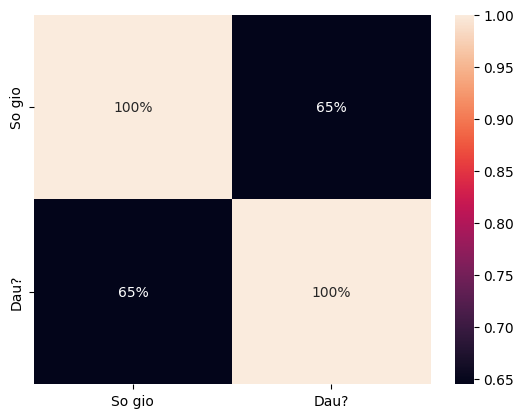

In [26]:
sns.heatmap(df[["So gio", "Dau?"]].corr(), annot=True, fmt='.0%')

### d) Build a suitable regression model to show the exam result basing on students' hours spent. Choose appropriate attributes and cite out the efficiency of the model.

This time I use Logistic Regression model. So what is the difference between Linear Regression model and the Logistic one?
- Linear Regression: The output is a continuous value on a number line.
- Logistic Regression: The output is the probability of **an event belonging to a specific category**. It typically outputs values between 0 and 1, where 0 represents a very low probability and 1 represents a very high probability.
=> We want to determine that the student can pass the exam or not, so Logistic Regression is the best choice.

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

prediction = model.predict(X_test)

print("Accuracy Rate: " + str(round(model.score(X_train, Y_train)*100, 2)) + "%")

Accuracy Rate: 81.25%


### e) Basing on the model in d), predict the result of a student who spent 3.75 hours

In [41]:
predict_result = model.predict([[3.75]])[0]

print(f"Predict Result: {predict_result}")

Predict Result: 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
